In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Desktop\Clg\MINI\IoT Network Intrusion Dataset.csv"

df = pd.read_csv(path)

df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [3]:
df['Cat'].value_counts()

Cat
Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: count, dtype: int64

In [4]:
df.shape

(625783, 86)

In [5]:
df= df[df['Cat'].isin(['DoS','Normal'])]
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.000000,0.0,0.0,2655.000000,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
9,192.168.0.13-111.149.163.151-554-7953-6,111.149.163.151,7953,192.168.0.13,554,6,26/05/2019 10:20:36 PM,6799,0,2,...,0.000000,0.0,0.0,6799.000000,0.000000,6799.0,6799.0,Anomaly,DoS,DoS-Synflooding
15,192.168.0.13-192.168.0.23-9020-44144-6,192.168.0.13,9020,192.168.0.23,44144,6,26/05/2019 10:06:28 PM,60431,5,7,...,326.401593,898.0,121.0,9708.333333,16525.220152,43394.0,1394.0,Anomaly,DoS,DoS-Synflooding
17,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 04:56:32 AM,120,1,1,...,0.000000,0.0,0.0,120.000000,0.000000,120.0,120.0,Normal,Normal,Normal
38,192.168.0.13-222.26.224.216-554-7004-6,222.26.224.216,7004,192.168.0.13,554,6,26/05/2019 10:06:50 PM,4125,5,2,...,0.000000,1803.0,1803.0,2322.000000,0.000000,2322.0,2322.0,Anomaly,DoS,DoS-Synflooding


In [6]:
df.shape

(99464, 86)

In [7]:
df['Cat'].value_counts()

Cat
DoS       59391
Normal    40073
Name: count, dtype: int64

In [8]:
df.dtypes

Flow_ID      object
Src_IP       object
Src_Port      int64
Dst_IP       object
Dst_Port      int64
             ...   
Idle_Max    float64
Idle_Min    float64
Label        object
Cat          object
Sub_Cat      object
Length: 86, dtype: object

In [9]:
df.isnull().sum()

Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64

In [10]:
check_nan = df.isnull().values.all()
check_nan

False

In [11]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('Cat')

cate_cols

['Timestamp', 'Dst_IP', 'Flow_ID', 'Src_IP', 'Sub_Cat', 'Label']

In [12]:
df.drop('Timestamp',axis = 1,inplace = True)
df.drop('Src_IP',axis = 1,inplace = True)
df.drop('Dst_IP',axis = 1,inplace = True)
df.drop('Sub_Cat',axis = 1,inplace = True)
df.drop('Label',axis = 1,inplace = True)
df.drop('Flow_ID',axis = 1,inplace = True)


In [13]:
mydf = df.copy()
pmap = {'DoS':1,'Normal':0}
mydf['Cat'] = mydf['Cat'].map(pmap)
mydf.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0,0.0,0.000000,0.0,0.0,2655.000000,2261.327486,4254.0,1056.0,1
9,7953,554,6,6799,0,2,0.0,0.0,0.0,0.0,...,0,0.0,0.000000,0.0,0.0,6799.000000,0.000000,6799.0,6799.0,1
15,9020,44144,6,60431,5,7,5680.0,1097.0,1388.0,1041.0,...,0,443.0,326.401593,898.0,121.0,9708.333333,16525.220152,43394.0,1394.0,1
17,9020,49784,6,120,1,1,30.0,1388.0,30.0,30.0,...,0,0.0,0.000000,0.0,0.0,120.000000,0.000000,120.0,120.0,0
38,7004,554,6,4125,5,2,0.0,0.0,0.0,0.0,...,0,1803.0,0.000000,1803.0,1803.0,2322.000000,0.000000,2322.0,2322.0,1


In [14]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

mydf = clean_dataset(mydf)

In [15]:
mydf.shape

(99464, 80)

In [16]:
def bar_graph(feature):
    mydf[feature].value_counts().plot(kind="bar")

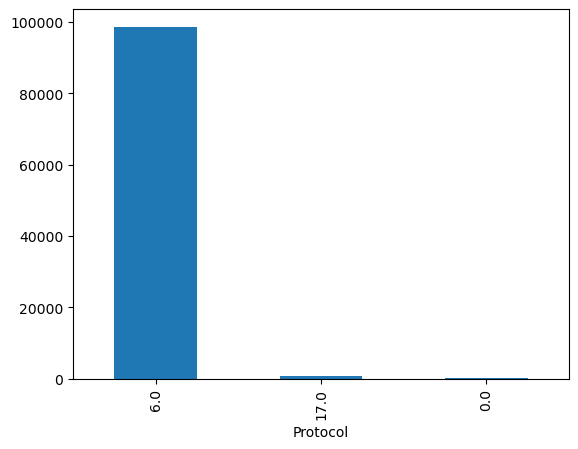

In [17]:
bar_graph('Protocol')

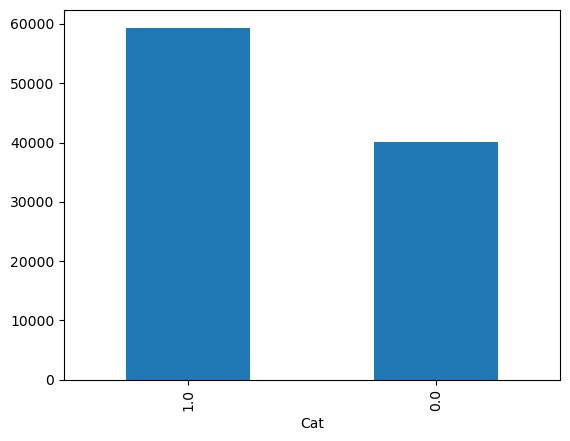

In [18]:
bar_graph('Cat')

In [19]:
mydf.columns

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg',
       

In [20]:
(mydf[[col for col in mydf if mydf[col].nunique() > 1]]).count()

Src_Port         99464
Dst_Port         99464
Protocol         99464
Flow_Duration    99464
Tot_Fwd_Pkts     99464
                 ...  
Idle_Mean        99464
Idle_Std         99464
Idle_Max         99464
Idle_Min         99464
Cat              99464
Length: 70, dtype: int64

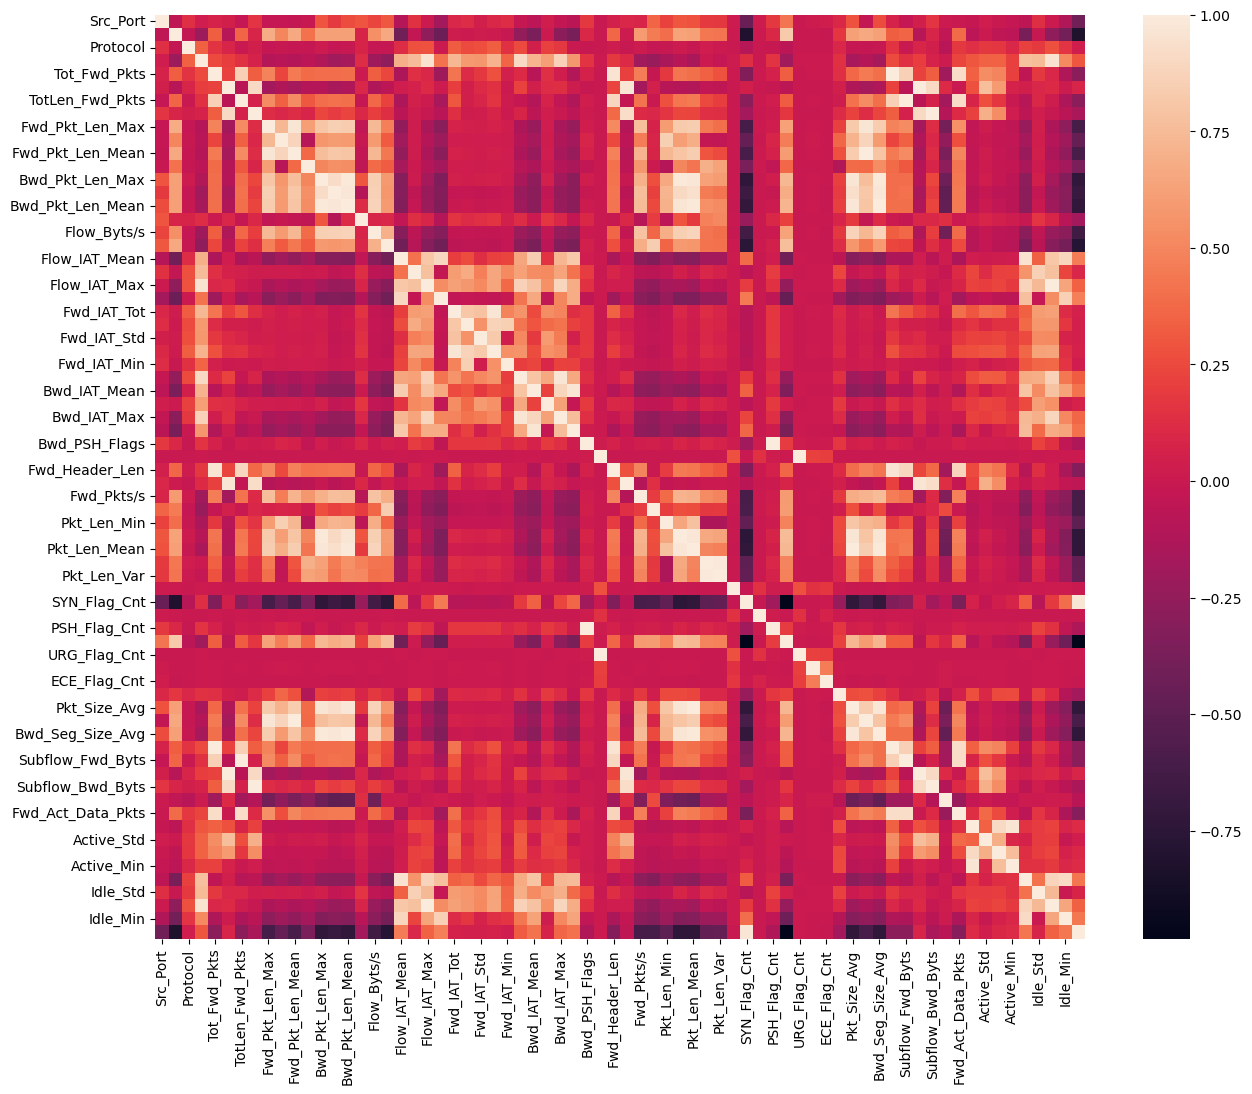

In [21]:
mydf = mydf[[col for col in mydf if mydf[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = mydf.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [22]:
mydf['Protocol'].value_counts()

Protocol
6.0     98670
17.0      683
0.0       111
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [24]:
Y = mydf[['Cat']]
X = mydf.drop(['Cat',], axis=1)
sc = MinMaxScaler()
X = sc.fit_transform(X)
# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(66640, 69) (32824, 69)
(66640, 1) (32824, 1)


In [ ]:
# Install the skfeature-chappers package
%pip install skfeature-chappers
    

from skfeature.function.statistical_based import CFS

Note: you may need to restart the kernel to use updated packages.


In [40]:

feature_index = CFS.cfs(X_train, Y_train) # fit on the trainset




In [44]:
#Order the features from high to low with CFS Algorithm
feature=[]
for i in feature_index:
  feature.append (mydf.columns[i])

In [45]:
print(feature)
len(feature)

['Idle_Min', 'Bwd_Header_Len', 'Fwd_IAT_Mean', 'TotLen_Fwd_Pkts', 'Fwd_Pkts/s', 'Flow_Pkts/s', 'Flow_IAT_Std', 'Pkt_Len_Var', 'Idle_Std', 'Fwd_IAT_Max', 'Pkt_Len_Max', 'Flow_IAT_Min', 'Flow_IAT_Mean', 'SYN_Flag_Cnt', 'Fwd_Seg_Size_Avg', 'Tot_Fwd_Pkts', 'ACK_Flag_Cnt', 'Fwd_IAT_Tot', 'Flow_IAT_Max', 'Subflow_Bwd_Pkts', 'Bwd_IAT_Max', 'Idle_Mean', 'Tot_Bwd_Pkts', 'Fwd_IAT_Std', 'Bwd_Pkt_Len_Mean', 'Pkt_Len_Mean', 'RST_Flag_Cnt', 'Active_Std', 'Bwd_PSH_Flags', 'Bwd_URG_Flags', 'Protocol', 'Subflow_Fwd_Byts', 'Fwd_Act_Data_Pkts', 'URG_Flag_Cnt', 'Fwd_IAT_Min', 'Fwd_Pkt_Len_Max', 'FIN_Flag_Cnt', 'CWE_Flag_Count', 'Bwd_IAT_Mean', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Dst_Port', 'Fwd_Pkt_Len_Min', 'Bwd_IAT_Min', 'TotLen_Bwd_Pkts', 'Bwd_Seg_Size_Avg', 'Flow_Duration', 'Idle_Max', 'Active_Min', 'Bwd_IAT_Std', 'Fwd_Pkt_Len_Mean', 'Init_Bwd_Win_Byts', 'Src_Port', 'Subflow_Fwd_Pkts', 'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Min', 'Subflow_Bwd_Byts', 'PSH_Flag_Cnt', 'Bwd_Pkt_Len_Max

69

In [46]:
feature_cfs_train=feature[:12]

In [47]:
print(feature_cfs_train)

['Idle_Min', 'Bwd_Header_Len', 'Fwd_IAT_Mean', 'TotLen_Fwd_Pkts', 'Fwd_Pkts/s', 'Flow_Pkts/s', 'Flow_IAT_Std', 'Pkt_Len_Var', 'Idle_Std', 'Fwd_IAT_Max', 'Pkt_Len_Max', 'Flow_IAT_Min']


In [48]:
pip install git+https://github.com/manuel-calzolari/sklearn-genetic.git



  Cloning https://github.com/manuel-calzolari/sklearn-genetic.git to c:\users\runni\appdata\local\temp\pip-req-build-_n8y0ecl
  Resolved https://github.com/manuel-calzolari/sklearn-genetic.git to commit a50ff08b0cc4d06c1ed3100025c721568f26d1cb
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/manuel-calzolari/sklearn-genetic.git 'C:\Users\runni\AppData\Local\Temp\pip-req-build-_n8y0ecl'


In [80]:
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np



X = mydf.drop(['Cat'], axis=1)
y = mydf[['Cat']].astype(float)
estimator = DecisionTreeClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=20,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)

# print the important features using the generic algorithm
print('Features:', X.columns[model.support_])

c:\Users\runni\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Features: Index(['Src_Port', 'Dst_Port', 'Tot_Bwd_Pkts', 'Fwd_IAT_Min', 'Bwd_IAT_Tot',
       'Bwd_IAT_Max', 'Bwd_Header_Len', 'URG_Flag_Cnt', 'Down/Up_Ratio',
       'Init_Bwd_Win_Byts', 'Active_Min', 'Idle_Mean', 'Idle_Max'],
      dtype='object')


In [81]:
yii = X.columns[model.support_]
tt =yii.tolist()
tt

['Src_Port',
 'Dst_Port',
 'Tot_Bwd_Pkts',
 'Fwd_IAT_Min',
 'Bwd_IAT_Tot',
 'Bwd_IAT_Max',
 'Bwd_Header_Len',
 'URG_Flag_Cnt',
 'Down/Up_Ratio',
 'Init_Bwd_Win_Byts',
 'Active_Min',
 'Idle_Mean',
 'Idle_Max']

In [82]:
from sklearn.tree import DecisionTreeClassifier
import time

In [ ]:
#Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

cfs_features = feature_cfs_train
# Split the data
X_all = mydf.drop(['Cat'], axis=1)
y_all = mydf['Cat'].astype(float)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# Model with all features
clf_all = DecisionTreeClassifier()
start_time1 = time.time()
clf_all.fit(X_train_all, y_train_all)
end_time1 = time.time()
print("Training time with all features: ", end_time1-start_time1)
start_time2 = time.time()
pred_all = clf_all.predict(X_test_all)
end_time2 = time.time()
print("Training time with all features: ", end_time2-start_time2)
print("With All Features:")
print("Accuracy:", accuracy_score(y_test_all, pred_all))
print("Precision:", precision_score(y_test_all, pred_all, average='macro'))
print("Recall:", recall_score(y_test_all, pred_all, average='macro'))
print("F1 Score:", f1_score(y_test_all, pred_all, average='macro'))
print()


X_cfs = mydf[cfs_features]
X_train_cfs, X_test_cfs, y_train_cfs, y_test_cfs = train_test_split(X_cfs, y_all, test_size=0.3, random_state=42)

clf_cfs = DecisionTreeClassifier()
start_time_cfs = time.time()
clf_cfs.fit(X_train_cfs, y_train_cfs)
end_time_cfs = time.time()
print("Training time with CFS features: ", end_time_cfs-start_time_cfs)
start_time_cfs = time.time()
pred_cfs = clf_cfs.predict(X_test_cfs)
end_time_cfs = time.time()
print("Testing time with CFS features: ", end_time_cfs-start_time_cfs)
print("With CFS Features:")
print("Accuracy:", accuracy_score(y_test_cfs, pred_cfs))
print("Precision:", precision_score(y_test_cfs, pred_cfs, average='macro'))
print("Recall:", recall_score(y_test_cfs, pred_cfs, average='macro'))
print("F1 Score:", f1_score(y_test_cfs, pred_cfs, average='macro'))
print()


# Using GA-selected features
ga_features = X_all.columns[model.support_]
X_ga = mydf[ga_features]
X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X_ga, y_all, test_size=0.3, random_state=42)

clf_ga = DecisionTreeClassifier()
start_time_ga = time.time()
clf_ga.fit(X_train_ga, y_train_ga)
end_time_ga = time.time()
print("Training time with GA features: ", end_time_ga-start_time_ga)
start_time_ga = time.time()
pred_ga = clf_ga.predict(X_test_ga)
end_time_ga = time.time()
print("Testing time with GA features: ", end_time_ga-start_time_ga)
print("With GA Features:")
print("Accuracy:", accuracy_score(y_test_ga, pred_ga))
print("Precision:", precision_score(y_test_ga, pred_ga, average='macro'))
print("Recall:", recall_score(y_test_ga, pred_ga, average='macro'))
print("F1 Score:", f1_score(y_test_ga, pred_ga, average='macro'))

Training time with all features:  0.36563658714294434
Training time with all features:  0.058199405670166016
With All Features:
Accuracy: 0.9995308310991957
Precision: 0.999484042910704
Recall: 0.9995392954465587
F1 Score: 0.9995116489562494

Training time with CFS features:  0.15927886962890625
Testing time with CFS features:  0.014792203903198242
With CFS Features:
Accuracy: 0.9993297587131368
Precision: 0.9993161252963733
Recall: 0.9992884802973236
F1 Score: 0.9993022977411655

Training time with GA features:  0.12158894538879395
Testing time with GA features:  0.007853507995605469
With GA Features:
Accuracy: 0.9996313672922252
Precision: 0.9996370204039082
Recall: 0.9995955192463019
F1 Score: 0.999616258445513


In [133]:
#Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

cfs_features = feature_cfs_train
# Split the data
X_all = mydf.drop(['Cat'], axis=1)
y_all = mydf['Cat'].astype(float)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# Model with all features
clf_all = RandomForestClassifier(n_estimators=30)
start_time = time.time()
clf_all.fit(X_train_all, y_train_all)
end_time = time.time()
print("Training time with all features: ", end_time-start_time)
start_time = time.time()
pred_all = clf_all.predict(X_test_all)
end_time = time.time()
print("Testing time with all features: ", end_time-start_time)
print("With All Features:")
print("Accuracy:", accuracy_score(y_test_all, pred_all))
print("Precision:", precision_score(y_test_all, pred_all, average='macro'))
print("Recall:", recall_score(y_test_all, pred_all, average='macro'))
print("F1 Score:", f1_score(y_test_all, pred_all, average='macro'))
print()

X_cfs = mydf[cfs_features]
X_train_cfs, X_test_cfs, y_train_cfs, y_test_cfs = train_test_split(X_cfs, y_all, test_size=0.3, random_state=42)

clf_cfs = RandomForestClassifier(n_estimators=30)
start_time_cfs = time.time()
clf_cfs.fit(X_train_cfs, y_train_cfs)
end_time_cfs = time.time()
print("Training time with CFS features: ", end_time_cfs-start_time_cfs)
start_time_cfs = time.time()
pred_cfs = clf_cfs.predict(X_test_cfs)
end_time_cfs = time.time()
print("Testing time with CFS features: ", end_time_cfs-start_time_cfs)
print("With CFS Features:")
print("Accuracy:", accuracy_score(y_test_cfs, pred_cfs))
print("Precision:", precision_score(y_test_cfs, pred_cfs, average='macro'))
print("Recall:", recall_score(y_test_cfs, pred_cfs, average='macro'))
print("F1 Score:", f1_score(y_test_cfs, pred_cfs, average='macro'))
print()

# Using GA-selected features
ga_features = X_all.columns[model.support_]
X_ga = mydf[ga_features]
X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X_ga, y_all, test_size=0.3, random_state=42)

clf_ga = RandomForestClassifier(n_estimators=30)
start_time_ga = time.time()
clf_ga.fit(X_train_ga, y_train_ga)
end_time_ga = time.time()
print("Training time with GA features: ", end_time_ga-start_time_ga)
start_time_ga = time.time()
pred_ga = clf_ga.predict(X_test_ga)
end_time_ga = time.time()
print("Testing time with GA features: ", end_time_ga-start_time_ga)
print("With GA Features:")
print("Accuracy:", accuracy_score(y_test_ga, pred_ga))
print("Precision:", precision_score(y_test_ga, pred_ga, average='macro'))
print("Recall:", recall_score(y_test_ga, pred_ga, average='macro'))
print("F1 Score:", f1_score(y_test_ga, pred_ga, average='macro'))

Training time with all features:  1.8397951126098633
Testing time with all features:  0.04510354995727539
With All Features:
Accuracy: 0.9994638069705094
Precision: 0.9994418536418388
Recall: 0.9994418536418388
F1 Score: 0.9994418536418388

Training time with CFS features:  1.1255443096160889
Testing time with CFS features:  0.0420069694519043
With CFS Features:
Accuracy: 0.9993632707774799
Precision: 0.9993579240423538
Recall: 0.9993164460672213
F1 Score: 0.9993371736786136

Training time with GA features:  0.9612274169921875
Testing time with GA features:  0.032003164291381836
With GA Features:
Accuracy: 0.9995643431635389
Precision: 0.9995810984120632
Recall: 0.9995119141965569
F1 Score: 0.9995464746941467


In [ ]:
#KNN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

cfs_features = feature_cfs_train
# Split the data
X_all = mydf.drop(['Cat'], axis=1)
y_all = mydf['Cat'].astype(float)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# Model with all features
clf_all = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
clf_all.fit(X_train_all, y_train_all)
end_time = time.time()
print("Training time with all features: ", end_time-start_time)
start_time = time.time()
pred_all = clf_all.predict(X_test_all)
end_time = time.time()
print("Testing time with all features: ", end_time-start_time)
print("With All Features:")
print("Accuracy:", accuracy_score(y_test_all, pred_all))
print("Precision:", precision_score(y_test_all, pred_all, average='macro'))
print("Recall:", recall_score(y_test_all, pred_all, average='macro'))
print("F1 Score:", f1_score(y_test_all, pred_all, average='macro'))
print()

X_cfs = mydf[cfs_features]
X_train_cfs, X_test_cfs, y_train_cfs, y_test_cfs = train_test_split(X_cfs, y_all, test_size=0.3, random_state=42)

clf_cfs = KNeighborsClassifier(n_neighbors=3)
start_time_cfs = time.time()
clf_cfs.fit(X_train_cfs, y_train_cfs)
end_time_cfs = time.time()
print("Training time with CFS features: ", end_time_cfs-start_time_cfs)
start_time_cfs = time.time()
pred_cfs = clf_cfs.predict(X_test_cfs)
end_time_cfs = time.time()
print("Testing time with CFS features: ", end_time_cfs-start_time_cfs)
print("With CFS Features:")
print("Accuracy:", accuracy_score(y_test_cfs, pred_cfs))
print("Precision:", precision_score(y_test_cfs, pred_cfs, average='macro'))
print("Recall:", recall_score(y_test_cfs, pred_cfs, average='macro'))
print("F1 Score:", f1_score(y_test_cfs, pred_cfs, average='macro'))
print()

# Using GA-selected features
ga_features = X_all.columns[model.support_]
X_ga = mydf[ga_features]
X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X_ga, y_all, test_size=0.3, random_state=42)

clf_ga = KNeighborsClassifier(n_neighbors=3)
start_time_ga = time.time()
clf_ga.fit(X_train_ga, y_train_ga)
end_time_ga = time.time()
print("Training time with GA features: ", end_time_ga-start_time_ga)
start_time_ga = time.time()
pred_ga = clf_ga.predict(X_test_ga)
end_time_ga = time.time()
print("Testing time with GA features: ", end_time_ga-start_time_ga)
print("With GA Features:")
print("Accuracy:", accuracy_score(y_test_ga, pred_ga))
print("Precision:", precision_score(y_test_ga, pred_ga, average='macro'))
print("Recall:", recall_score(y_test_ga, pred_ga, average='macro'))
print("F1 Score:", f1_score(y_test_ga, pred_ga, average='macro'))

Training time with all features:  0.08364033699035645
Testing time with all features:  5.535170078277588
With All Features:
Accuracy: 0.9982238605898124
Precision: 0.9979675601361313
Recall: 0.9983379363807516
F1 Score: 0.9981518290761064

Training time with CFS features:  0.20331597328186035
Testing time with CFS features:  3.4684035778045654
With CFS Features:
Accuracy: 0.9980563002680966
Precision: 0.9977731118010946
Recall: 0.9981842707762886
F1 Score: 0.9979775568452923

Training time with GA features:  0.1734764575958252
Testing time with GA features:  2.0847625732421875
With GA Features:
Accuracy: 0.9991286863270777
Precision: 0.9990380274665402
Recall: 0.9991483591878876
F1 Score: 0.9990931124871785


In [135]:
#SVM

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

cfs_features = feature_cfs_train
# Split the data
X_all = mydf.drop(['Cat'], axis=1)
y_all = mydf['Cat'].astype(float)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# Model with all features
clf_all = SVC(gamma = 'scale')
start_time = time.time()
clf_all.fit(X_train_all, y_train_all)
end_time = time.time()
print("Training time with all features: ", end_time-start_time)
start_time = time.time()
pred_all = clf_all.predict(X_test_all)
end_time = time.time()
print("Testing time with all features: ", end_time-start_time)
print("With All Features:")
print("Accuracy:", accuracy_score(y_test_all, pred_all))
print("Precision:", precision_score(y_test_all, pred_all, average='macro'))
print("Recall:", recall_score(y_test_all, pred_all, average='macro'))
print("F1 Score:", f1_score(y_test_all, pred_all, average='macro'))
print()

X_cfs = mydf[cfs_features]
X_train_cfs, X_test_cfs, y_train_cfs, y_test_cfs = train_test_split(X_cfs, y_all, test_size=0.3, random_state=42)

clf_cfs = SVC(gamma = 'scale')
start_time_cfs = time.time()
clf_cfs.fit(X_train_cfs, y_train_cfs)
end_time_cfs = time.time()
print("Training time with CFS features: ", end_time_cfs-start_time_cfs)
start_time_cfs = time.time()
pred_cfs = clf_cfs.predict(X_test_cfs)
end_time_cfs = time.time()
print("Testing time with CFS features: ", end_time_cfs-start_time_cfs)
print("With CFS Features:")
print("Accuracy:", accuracy_score(y_test_cfs, pred_cfs))
print("Precision:", precision_score(y_test_cfs, pred_cfs, average='macro'))
print("Recall:", recall_score(y_test_cfs, pred_cfs, average='macro'))
print("F1 Score:", f1_score(y_test_cfs, pred_cfs, average='macro'))
print()

# Using GA-selected features
ga_features = X_all.columns[model.support_]
X_ga = mydf[ga_features]
X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X_ga, y_all, test_size=0.3, random_state=42)

clf_ga = SVC(gamma = 'scale')
start_time_ga = time.time()
clf_ga.fit(X_train_ga, y_train_ga)
end_time_ga = time.time()
print("Training time with GA features: ", end_time_ga-start_time_ga)
start_time_ga = time.time()
pred_ga = clf_ga.predict(X_test_ga)
end_time_ga = time.time()
print("Testing time with GA features: ", end_time_ga-start_time_ga)
print("With GA Features:")
print("Accuracy:", accuracy_score(y_test_ga, pred_ga))
print("Precision:", precision_score(y_test_ga, pred_ga, average='macro'))
print("Recall:", recall_score(y_test_ga, pred_ga, average='macro'))
print("F1 Score:", f1_score(y_test_ga, pred_ga, average='macro'))

Training time with all features:  148.31193780899048
Testing time with all features:  50.057676792144775
With All Features:
Accuracy: 0.8838806970509383
Precision: 0.9170491549842443
Recall: 0.8557353950257235
F1 Score: 0.871391181078961

Training time with CFS features:  23.131553649902344
Testing time with CFS features:  19.30362367630005
With CFS Features:
Accuracy: 0.9935321715817694
Precision: 0.992060227085733
Recall: 0.9946026064097544
F1 Score: 0.9932849995127675

Training time with GA features:  2.2270407676696777
Testing time with GA features:  1.4647610187530518
With GA Features:
Accuracy: 0.997117962466488
Precision: 0.9968105414950541
Recall: 0.9971936778945316
F1 Score: 0.997001122428887
